In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline      

When you are looking at a dataset for the very first time, some good steps are;
 1. Look at the top and bottom of the data (sometimes extra headers or footers may have snuck in)
 2. Examine the shape of the data, the datatype of each variable (column), and the amount of missing data (NAs)
 3. Get `value_counts()` for categorical values
 4. Understanding the statistical dimensions (minimum, maximum, mean, median, standard deviation) of numerical values
 

In [2]:
people_df = pd.read_csv('../data/people.csv')
people_df.head()

,name,age,sex,height,weight,bmi,sibling_count,birth_order,years_played_sports
0,Jin,15,M,66,165,26.63,4,5,5
1,Sue,24,F,62,136,24.87,2,1,10
2,Ellen,23,F,69,167,24.66,3,2,8
3,Tina,18,F,67,140,18.79,1,2,0
4,Jerry,47,M,66,182,29.37,1,1,5


In [3]:
people_df.tail()

,name,age,sex,height,weight,bmi,sibling_count,birth_order,years_played_sports
15,Stan,44,M,68,162,24.63,6,4,30
16,Jen,38,NaN,57,153,33.11,0,1,1
17,Maria,17,F,68,111,16.88,1,2,1
18,Linda,66,F,65,160,26.62,3,2,45
19,Barb,74,NaN,64,144,24.71,4,3,39


The `.info()` method gives us datatypes, shape, missingness (and memory usage) all at once!

In [4]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 20 non-null     object 
 1   age                  20 non-null     int64  
 2   sex                  17 non-null     object 
 3   height               20 non-null     int64  
 4   weight               20 non-null     int64  
 5   bmi                  20 non-null     float64
 6   sibling_count        20 non-null     int64  
 7   birth_order          20 non-null     int64  
 8   years_played_sports  20 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.5+ KB


Another way you can get a quick sense of missing values is by chaining the `.isnull()` and `.sum()` methods.   
 - Why does this work?

In [5]:
people_df.isnull().sum()

name                   0
age                    0
sex                    3
height                 0
weight                 0
bmi                    0
sibling_count          0
birth_order            0
years_played_sports    0
dtype: int64

We can quickly understand the distribution of males and females in the dataset with `value_counts()`

In [6]:
people_df.sex.value_counts()

M    9
F    8
Name: sex, dtype: int64

And count the number of unique names with `.nunique()`

In [7]:
people_df.name.nunique()

20

To get a lot of statistical detail about the numeric variables in the dataset, use the `.describe()` method

In [8]:
people_df.describe()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,39.000000,67.500000,169.950000,25.76000,1.850000,2.000000,9.900000
std,18.948684,4.223992,29.653215,3.78468,1.598519,1.169795,13.863621
min,15.000000,57.000000,111.000000,16.88000,0.000000,1.000000,0.000000
25%,22.750000,66.000000,150.750000,24.65250,1.000000,1.000000,1.000000
50%,35.000000,67.500000,166.000000,26.62500,1.500000,2.000000,4.500000
75%,54.000000,69.250000,187.750000,27.73750,3.000000,3.000000,10.000000
max,74.000000,78.000000,234.000000,33.11000,6.000000,5.000000,45.000000


`pandas` has a `df.plot()` method that will plot *all* numerical values with a single call, but it is generally not useful to do that!

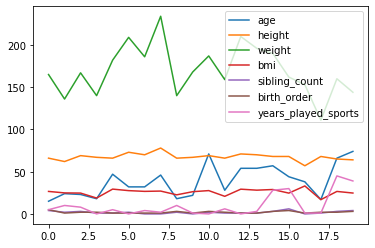

In [9]:
people_df.plot();

You can use [matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html) and his fancy cousin [seaborn](https://seaborn.pydata.org/) to create more useful plots. Plots are another way you do exploratory data analysis. Plots can show you interesting things in the data.

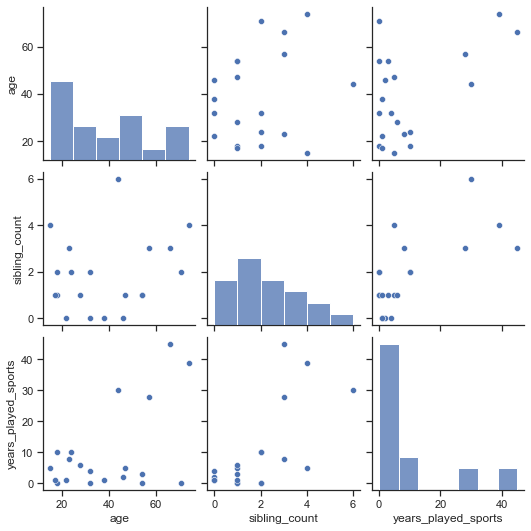

In [24]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(people_df, vars=["age", "sibling_count", "years_played_sports"]);

Barplots are a good way to look at discrete numerical and categorical data 

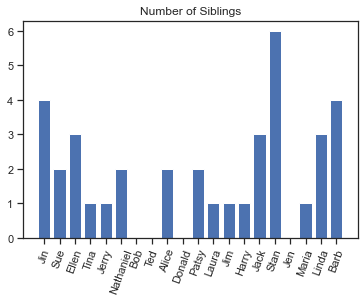

In [11]:
plt.bar('name', 'sibling_count', data = people_df)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

You make make barplots more readable by sorting the measured values first

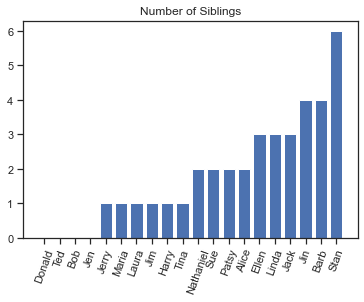

In [12]:
data = people_df.sort_values('sibling_count')
plt.bar('name', 'sibling_count', data = data)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

If you plot a numerical value without realizing it is discrete and not continuous, that fact might not be obvious at first.

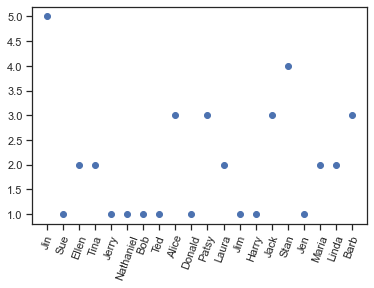

In [13]:
plt.plot('name', 'birth_order', marker = 'o', linestyle = 'none', data = people_df)
plt.xticks(rotation = 70);

Sorting the dataset according to the numerical data *before* plotting will make it obvious that you have discrete values!

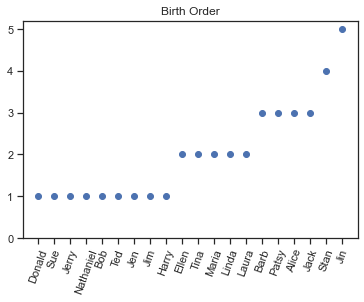

In [14]:
data = people_df.sort_values('birth_order')
plt.plot('name', 'birth_order', marker = 'o', linestyle = 'none', data = data)
plt.xticks(rotation = 70)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.title('Birth Order');

A histogram is often the first choice for visualizing the distribution of a continuous variable. Here's a histogram of the BMI values. You can adjust the number of bins with the `bins` argument.

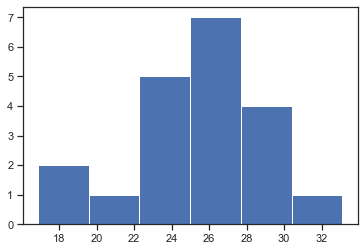

In [15]:
plt.hist('bmi', bins = 6, data = people_df);

Scatterplots are useful for plotting two continuous numerical variables to examine their relationship. In the plot below you can clearly see that height and weight are related in our people data.

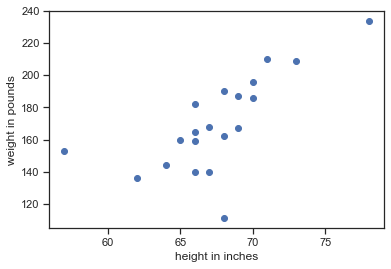

In [16]:
plt.scatter('height', 'weight', data = people_df)
plt.xlabel('height in inches')
plt.ylabel('weight in pounds');

The relationship between weight and BMI is a little less clear in the next plot.

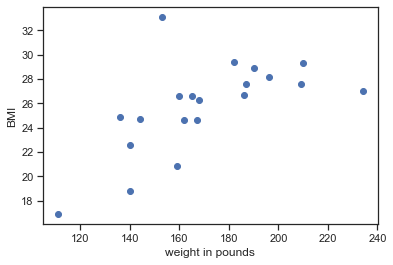

In [17]:
plt.scatter('weight', 'bmi', data = people_df)
plt.xlabel('weight in pounds')
plt.ylabel('BMI');

But there are ways you can make this plot more useful. 
 - add a line to show where BMI is considered to indicate `overweight` and `obese`
 - add annotation to make it clear what theses lines show

<ipython-input-18-36f2e8fe1bb0>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = 'overweight', xy = (1, 25.5))
<ipython-input-18-36f2e8fe1bb0>:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = 'obese', xy = (1, 30.5))


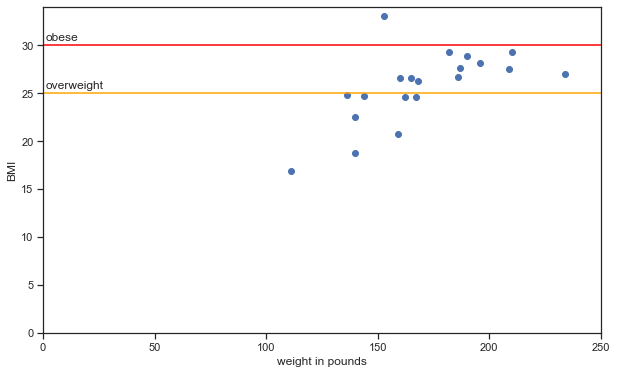

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter('weight', 'bmi', data = people_df)
plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(0, 250)
plt.ylim(0, 34)
plt.annotate(s = 'overweight', xy = (1, 25.5))
plt.annotate(s = 'obese', xy = (1, 30.5))

plt.xlabel('weight in pounds')

plt.ylabel('BMI');

Boxplots also give you a lot of information about a continuous variable in your dataset. The middle line through the box indicates the median value. The top and botton sides of the box are the 75th and 25th percentiles (3rd and 4th quartiles). The bars above and below the box (called whiskers) indicated the bounds for the upper and lower extremes of the distribution. Any points (values) beyond the whiskers are considered outliers.

With seaborn, creating a boxplot is as easy as passing the variable to examine to the `y` argument.

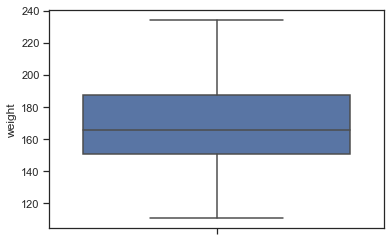

In [19]:
sns.boxplot(y=people_df.weight);

You can easily compare distributions between categories by specifying that category variable as `x` in a seaborn boxplot. Look next at how the distribution of weight varies by sex.

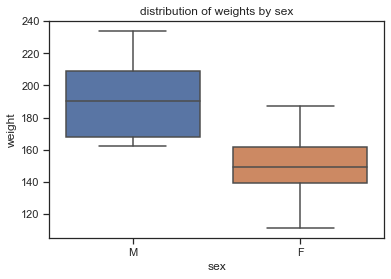

In [20]:
sns.boxplot(y=people_df.weight, x = people_df.sex, )
plt.title('distribution of weights by sex');
#plt.xlabel('')

Finally, take a look at a few more kinds of seaborn plots that might help you understand the data.

Violin plots combine aspects of a boxplot and histogram.

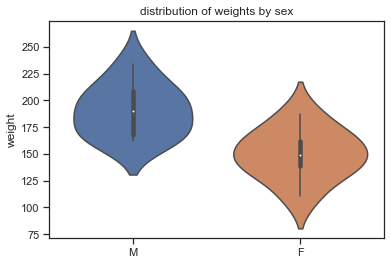

In [21]:
sns.violinplot(y=people_df.weight, x = people_df.sex)
plt.title('distribution of weights by sex')
plt.xlabel('');

Remember the plot of birth orders above? A better plot choice for exploring those values would have been a strip plot. The `jitter` argument tells seaborn whether you want the points randomly moved off center. Below is a stripplot of heights by sex without jitter.

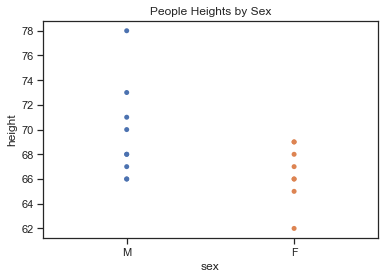

In [22]:
sns.stripplot(x=people_df.sex, y=people_df.height, jitter = False) 
plt.title('People Heights by Sex');

A swarm plot is just a strip plot with jitter automatically added!

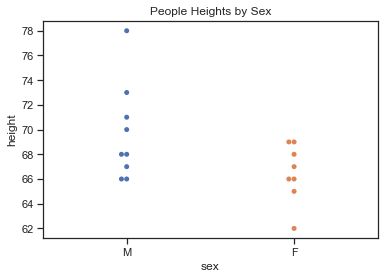

In [23]:
sns.swarmplot(x=people_df.sex, y=people_df.height);
plt.title('People Heights by Sex');